# Antes de empezar :
   - Estos ejercicios están relacionados con las lecciones Subconjunto y Estadísticas descriptivas.
   - Tenga en cuenta que necesitará utilizar algunas de las funciones que aprendió en las lecciones anteriores.
   - Todos los conjuntos de datos se proporcionan en la carpeta `your-code` de este laboratorio.
   - Elabora tus códigos y resultados tanto como puedas.
   - Esfuérzate al máximo para responder a las preguntas y completar las tareas y, sobre todo, ¡¡¡disfruta del proceso!!!

#### Importa todas las librerías necesarias

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns

# Desafío 1

#### En este reto utilizaremos el archivo `Temp_States.csv`. 

#### Primero impórtalo en un marco de datos llamado `temp`.

In [2]:
temp = pd.read_csv('./Temp_States.csv')
temp.head()

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444


#### Print `temp`

In [3]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore los tipos de datos del marco de datos Temp. ¿Qué tipo de datos tenemos? Comenta tu resultado.

In [4]:
temp.info()
#Tenemos datos de tipo object y float


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


#### Selecciona las filas en las que el estado es New York

In [5]:
temp[temp['State'] == 'New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### ¿Cuál es la temperatura media de las ciudades de Nueva York?

In [6]:
temp[temp['State'] == 'New York']['Temperature'].mean()

10.74074074074074

#### Queremos conocer las ciudades y estados con temperaturas superiores a 15 grados centígrados.

In [7]:
tempHigher = temp[temp['Temperature'] > 15]
tempHigher[['State', 'City']]

,State,City
0,New York,NYC
3,Connecticut,Hartford
5,New Jersey,Treton
6,New Jersey,Newark


#### Ahora, devuelva sólo las ciudades que tengan una temperatura superior a 15 grados centígrados.

In [8]:
tempHigher = temp[temp['Temperature'] > 15]['City']
tempHigher

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### Queremos saber qué ciudades tienen una temperatura superior a 15 grados Celcius e inferior a 20 grados Celcius

*Pista: Primero escriba la condición y luego seleccione las filas.

In [20]:
tempBetween = temp[(temp['Temperature'] > 15) & (temp['Temperature'] < 20) ]['City']
tempBetween

0         NYC
3    Hartford
Name: City, dtype: object

In [21]:
temp['State'].value_counts()

State
New York       3
Connecticut    2
New Jersey     2
Name: count, dtype: int64

#### Halla la media y la desviación estándar de la temperatura de cada estado.

*Pista: Utiliza las funciones de la lección Manipulación de datos*.

In [9]:
df_media = temp.groupby('State')['Temperature'].agg('mean')
df_desviación = temp.groupby('State')['Temperature'].agg('std')

print(f"Media: {df_media}")
print(f"Desviación: {df_desviación}")

Media: State
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
Name: Temperature, dtype: float64
Desviación: State
Connecticut    1.964186
New Jersey     1.571348
New York       8.133404
Name: Temperature, dtype: float64


# Desafío 2

#### Cargar el fichero `employee.csv` en un DataFrame. Llama al dataframe `employee`.

In [12]:
employee = pd.read_csv('./employee.csv')
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### Explore los tipos de datos del marco de datos employee. Comenta tus resultados

In [13]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


In [ ]:
# Tiene tipos object e int64, que almacenan strings y valores enteros respectivamente

#### Muestre visualmente la distribución de frecuencias (histograma) del conjunto de datos de empleados. Describa en pocas palabras estos histogramas.

Text(0, 0.5, 'Frecuencia')

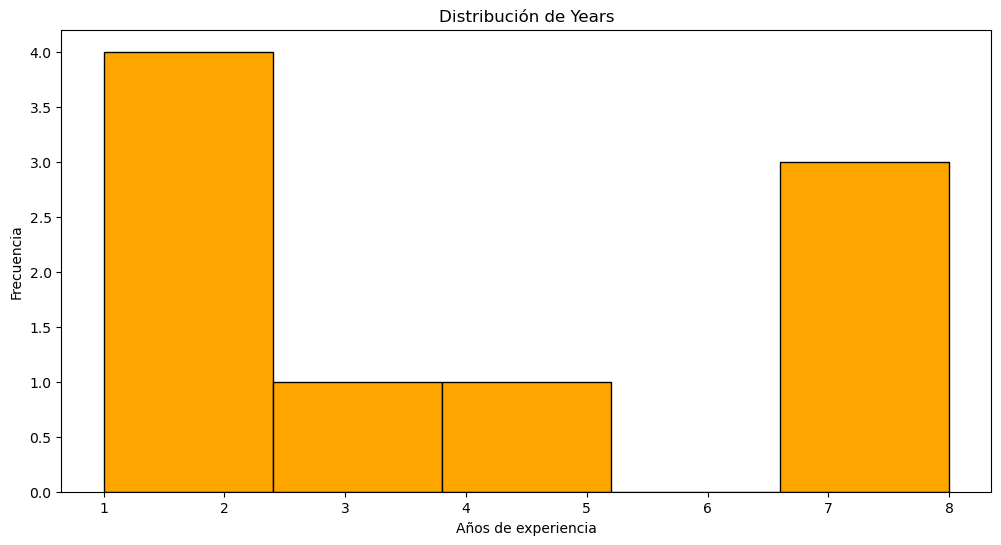

In [14]:
plt.figure(figsize=(12, 6))
plt.hist(employee['Years'], bins=5, color='orange', edgecolor='black')
plt.title('Distribución de Years')
plt.xlabel('Años de experiencia')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

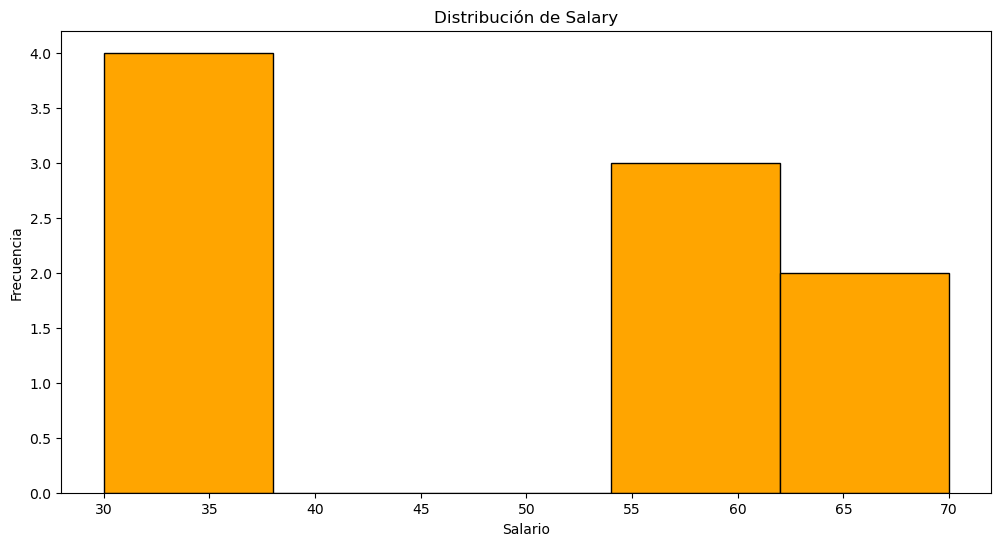

In [16]:
plt.figure(figsize=(12, 6))
plt.hist(employee['Salary'], bins=5, color='orange', edgecolor='black')
plt.title('Distribución de Salary')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')

In [ ]:
# Descripción
# en el eje x se agrupan en intervalos (bins) rangos de valores
# en el eje y el número de empleados que pertenece a cada intervalo
# El histograma de los años muestra que la mayória de los empleados tienen muy poca experiencia y que hay también muchos empleados con más años de 6 años de experiencia 
# El histograma del salario muestra como ma mayoría de los empleados ganan sueldos más bajos

#### ¿Cuál es el salario medio en esta empresa?

In [19]:
salary_mean = employee['Salary'].mean()
print(f"El salario medio es de: {salary_mean:.2f}k")

El salario medio es de: 48.89k


#### ¿Cuál es el salario más alto?

In [20]:
salary_max = employee['Salary'].max()
print(f"El salario máximo es de: {salary_max:.2f}k")

El salario máximo es de: 70.00k


#### ¿Cuál es el salario más bajo?

In [21]:
salary_min = employee['Salary'].min()
print(f"El salario mínimo es de: {salary_min:.2f}k")

El salario mínimo es de: 30.00k


#### ¿Quiénes son los empleados con el salario más bajo?

In [35]:
employees_salary_min = employee[employee['Salary'] == salary_min]
employees_salary_min

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### ¿Podría darnos toda la información sobre un empleado llamado David?

In [23]:
employee_david = employee[employee['Name'] == 'David']
employee_david

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### ¿Podría dar sólo el sueldo de David?

In [34]:
employee_david_salary = employee.loc[employee['Name'] == 'David', 'Salary']
print(f"El salario de David es: {employee_david_salary.iloc[0]:.2f}k")

El salario de David es: 30.00k


#### Printea todas las líneas en las que el cargo es asociado

In [37]:
employees_title_asociate = employee[employee['Title'] == 'associate']
employees_title_asociate

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Printea las 3 primeras filas de tu dataframe

##### Consejo : Hay 2 maneras de hacerlo. Hazlo de las dos maneras

In [40]:
# With head
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


In [41]:
# With slicing
employee.iloc[:5]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### ¿Encuentra a los empleados cuyo cargo es asociado y cuyo salario es superior a 55?

In [42]:
employee_associate_salary_55 = employee[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]
employee_associate_salary_55

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Agrupa a los empleados en función del número de años que llevan trabajando. ¿Cuáles son los salarios medios de cada grupo?

In [44]:
group_salary_years = employee.groupby('Years')['Salary'].mean().reset_index()
group_salary_years

,Years,Salary
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


#### ¿Cuál es el salario medio por título?

In [46]:
salary_by_title = employee.groupby('Title')['Salary'].mean().reset_index()
salary_by_title

,Title,Salary
0,VP,70.000000
1,analyst,32.500000
2,associate,56.666667


#### Muestra un resumen visual de los datos utilizando boxplot. ¿Cuáles son los cuartiles primero y tercero? Comenta tus resultados.

* Pista : Cuantiles vs Cuartiles*.
En Probabilidad y Estadística, los cuantiles son puntos de corte que dividen el rango de una distribución de probabilidad en intervalos continuos con probabilidades iguales. Cuando la división es en cuatro partes, los valores de la variable correspondientes al 25%, 50% y 75% de la distribución total se denominan cuartiles.

Text(0, 0.5, 'Salario')

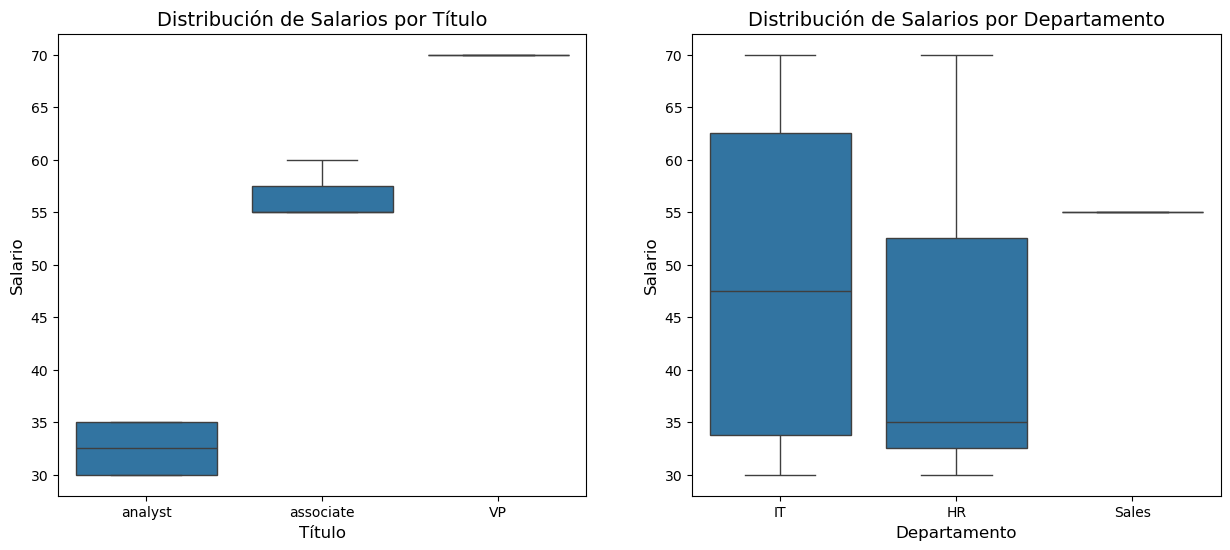

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 
sns.boxplot(data=employee, x='Title', y='Salary', ax=axes[0])
axes[0].set_title('Distribución de Salarios por Título', fontsize=14)
axes[0].set_xlabel('Título', fontsize=12)
axes[0].set_ylabel('Salario', fontsize=12)


sns.boxplot(data=employee, x='Department', y='Salary', ax=axes[1])
axes[1].set_title('Distribución de Salarios por Departamento', fontsize=14)
axes[1].set_xlabel('Departamento', fontsize=12)
axes[1].set_ylabel('Salario', fontsize=12)


In [49]:
# print first quartile here
q1 = employee['Salary'].quantile(0.25)
q1

35.0

In [50]:
# print third quartile here
q3 = employee['Salary'].quantile(0.75)
q3

60.0

#### ¿Es diferente el salario medio por género?

In [51]:
salary_by_gender = employee.groupby('Gender')['Salary'].mean().reset_index()
salary_by_gender

,Gender,Salary
0,F,47.5
1,M,50.0


#### Encuentra el mínimo, la media y el máximo de todas las columnas numéricas para cada Departamento.

##### Sugerencia: Utiliza las funciones de la lección Manipulación de Datos

In [55]:
employee_numerical_data = employee.select_dtypes(include=['number'])
employee_numerical_data

,Years,Salary
0,1,35
1,2,30
2,2,30
3,4,35
4,3,55
5,2,55
6,8,70
7,7,60
8,8,70


In [60]:
department_employee_numerical_data = employee_numerical_data.join(employee['Department'])
department_employee_numerical_data

,Years,Salary,Department
0,1,35,IT
1,2,30,IT
2,2,30,HR
3,4,35,HR
4,3,55,Sales
5,2,55,Sales
6,8,70,IT
7,7,60,IT
8,8,70,HR


In [67]:
data_by_department = department_employee_numerical_data.groupby('Department').agg(['min', 'mean', 'max'])
data_by_department

Years               Salary           
             min      mean max    min   mean max
Department                                      
HR             2  4.666667   8     30  45.00  70
IT             1  4.500000   8     30  48.75  70
Sales          2  2.500000   3     55  55.00  55

In [68]:
# Flat departament columns
data_by_department.columns = ['_'.join(col) for col in data_by_department.columns]
data_by_department

,Years_min,Years_mean,Years_max,Salary_min,Salary_mean,Salary_max
Department,,,,,,
HR,2,4.666667,8,30,45.00,70
IT,1,4.500000,8,30,48.75,70
Sales,2,2.500000,3,55,55.00,55


### Pregunta bonus

#### Para cada departamento, calcule la diferencia entre el salario máximo y el salario mínimo.

##### * Sugerencia: pruebe a utilizar `agg` o `apply` y `lambda`*.

In [ ]:
# Group data with new columns
salary_data = employee.groupby('Department')['Salary'].agg(
    min_salary='min', 
    max_salary='max'
)
salary_data

,min_salary,max_salary
Department,,
HR,30,70
IT,30,70
Sales,55,55


In [73]:
# Show difference
salary_data['difference'] = salary_data['max_salary'] - salary_data['min_salary']
salary_data

,min_salary,max_salary,difference
Department,,,
HR,30,70,40
IT,30,70,40
Sales,55,55,0


# Desafío 3

#### Abra el conjunto de datos Orders.csv. Nombre el conjunto de datos pedidos

In [74]:
pedidos = pd.read_csv('./Orders.csv')
pedidos.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore su conjunto de datos observando los tipos de datos y las estadísticas de resumen. Comenta tus resultados

In [77]:
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [78]:
pedidos.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


#### ¿Cuál es el precio medio de compra?

In [80]:
mean_price = pedidos['amount_spent'].mean()
print(f'El precio medio dee compra es {mean_price:.2f}')

El precio medio dee compra es 22.39


#### ¿Cuáles fueron los precios de compra más altos y más bajos? 

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


In [ ]:
# your answer here

#### Seleccione todos los clientes que tenemos en España

In [85]:
orders_spain_customers = pedidos[pedidos['Country'] == 'Spain']
orders_spain_customers

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### ¿Cuántos clientes tenemos en España?
##### Pista : Utiliza value_counts()

In [ ]:
# Usando value_counts()
customers_by_country_spain = pedidos[pedidos['Country'] == 'Spain']
n_customers_by_country_spain = customers_by_country_spain['CustomerID'].value_counts()
print(f"Número de clientes en España: {n_customers_by_country_spain.count()}")

Número de clientes en España: 30


In [139]:
# Usando nunique()
spain_orders = pedidos[pedidos['Country'] == 'Spain']
n_spain_customers = spain_orders['CustomerID'].nunique()
print(f"Número de clientes en España: {n_spain_customers}")

Número de clientes en España: 30


#### Selecciona todos los clientes que han comprado más de 50 artículos ?

In [104]:
customers_articles = pedidos.groupby('CustomerID')['Quantity'].sum()
customers_articles_more_50 = customers_articles[customers_articles > 50]
len(customers_articles_more_50)

4091

#### Selecciona pedidos de España superiores a 50 artículos

In [118]:
spain_customers_articles = spain_orders.groupby('CustomerID')['Quantity'].sum()
spain_customers_articles_more_50 = spain_customers_articles[spain_customers_articles > 50]
len(spain_customers_articles_more_50)

29

#### Seleccionar todos los pedidos gratuitos

In [109]:
free_orders = pedidos[pedidos['amount_spent'] == 0.0]
print(f"Se han realizado {len(free_orders)} pedidos gratuitos.")
free_orders

Se han realizado 40 pedidos gratuitos.


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Seleccionar todos los pedidos que sean 'lunch bag
#### Pista: Utilice las funciones de cadena

In [114]:
lunch_bag_orders = pedidos[pedidos['Description'].str.contains('lunch bag', case=False, na=False)]
print(f"Hay {len(lunch_bag_orders)} pedidos de lunch bag.")
lunch_bag_orders

Hay 11556 pedidos de lunch bag.


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Seleccione todos los pedidos realizados en 2011 y que sean «lunch bag».  

In [132]:
lunch_bag_orders_2011 = lunch_bag_orders[lunch_bag_orders['year'] == 2011]
print(f"Hay {len(lunch_bag_orders_2011)} pedidos de lunch bag en el año 2011.")
lunch_bag_orders_2011

Hay 11234 pedidos de lunch bag en el año 2011.


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Muestra la distribución de frecuencias del importe gastado en España.

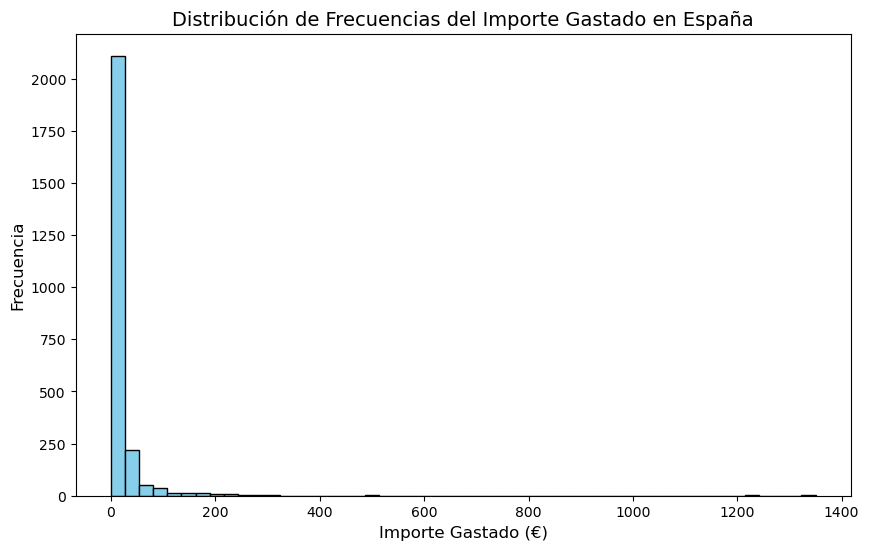

In [119]:
plt.figure(figsize=(10, 6))
plt.hist(spain_orders['amount_spent'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de Frecuencias del Importe Gastado en España', fontsize=14)
plt.xlabel('Importe Gastado (€)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

In [121]:
len(spain_orders)

2485

In [122]:
spain_orders_no_free = spain_orders[spain_orders['amount_spent'] > 0.0]
len(spain_orders_no_free)

2484

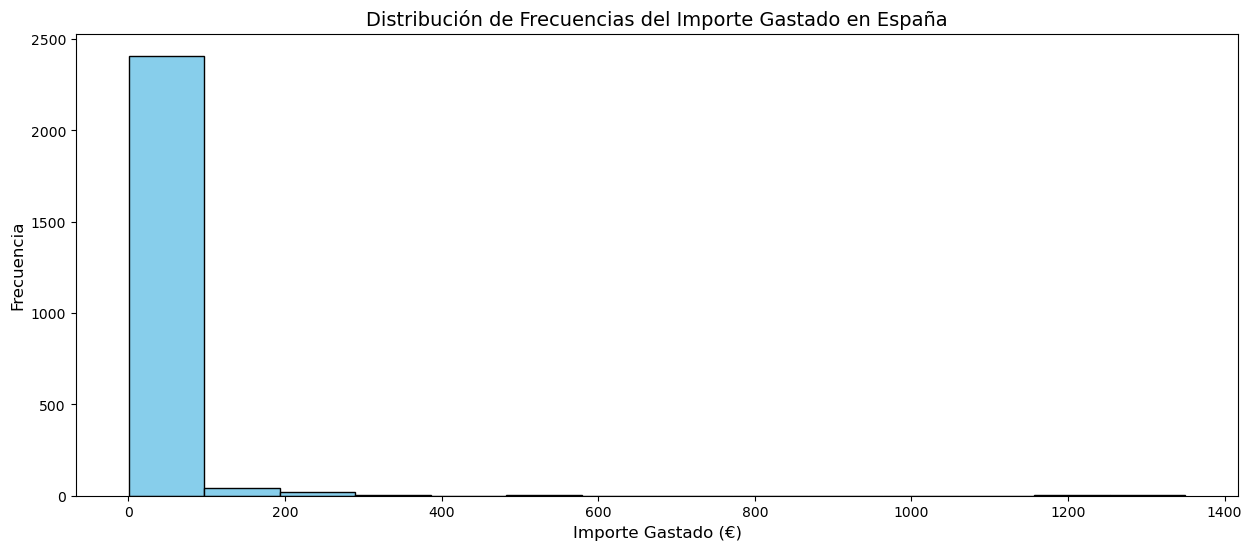

In [127]:
spain_orders_no_free = spain_orders[spain_orders['amount_spent'] > 0.0]
plt.figure(figsize=(15, 6))
plt.hist(spain_orders_no_free['amount_spent'], bins=14, color='skyblue', edgecolor='black')
plt.title('Distribución de Frecuencias del Importe Gastado en España', fontsize=14)
plt.xlabel('Importe Gastado (€)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

/var/folders/sf/_xs8tn6s67l9gw50myp0hbk80000gn/T/ipykernel_31425/1970926193.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(spain_orders['amount_spent'], shade=True, color='skyblue')


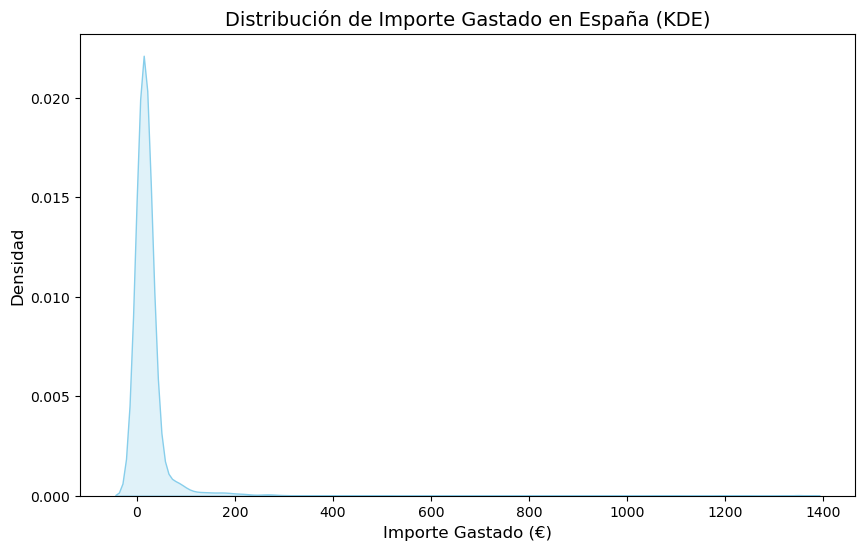

In [128]:
# Probar mostrar con KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(spain_orders['amount_spent'], shade=True, color='skyblue')
plt.title('Distribución de Importe Gastado en España (KDE)', fontsize=14)
plt.xlabel('Importe Gastado (€)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.show()

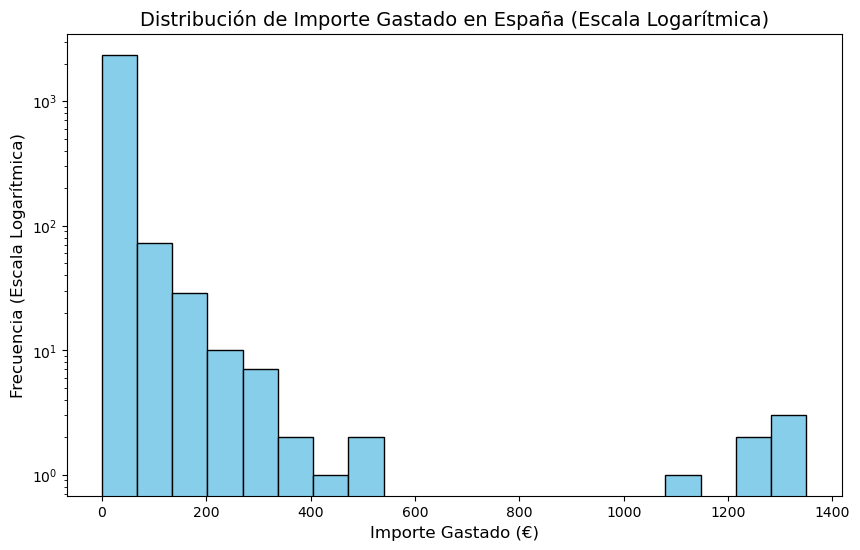

In [ ]:
# Probar ajustar log
plt.figure(figsize=(10, 6))
plt.hist(spain_orders['amount_spent'], bins=20, color='skyblue', edgecolor='black')

# Ajustar la escala logarítmica compensar dif en el eje Y
plt.yscale('log')

plt.title('Distribución de Importe Gastado en España (Escala Logarítmica)', fontsize=14)
plt.xlabel('Importe Gastado (€)', fontsize=12)
plt.ylabel('Frecuencia (Escala Logarítmica)', fontsize=12)
plt.show()

#### Seleccione todos los pedidos realizados en el mes de agosto

In [133]:
august_orders = pedidos[pedidos['month'] == 8]
len(august_orders)

27013

#### Seleccione cuántos pedidos se realizan por países en el mes de agosto
##### Pista: Utilice value_counts()

In [134]:
august_orders_by_country = august_orders['Country'].value_counts()
august_orders_by_country

Country
United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: count, dtype: int64

#### ¿Cuál es el gasto medio por país?

In [140]:
mean_amount_spent_by_country = pedidos.groupby('Country')['amount_spent'].mean()
mean_amount_spent_by_country

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### ¿Cuál es el artículo más caro?

In [148]:
expensive_article = pedidos.loc[pedidos['UnitPrice'].idxmax()]
expensive_article
print(f"El artículo más caro es el articulo: {expensive_article['Description']} con un precio de: {expensive_article['UnitPrice']}€")

El artículo más caro es el articulo: postage con un precio de: 8142.75€


#### ¿Cuál fue la cantidad media gastada al año?

In [149]:
mean_amount_spent_by_year = pedidos.groupby('year')['amount_spent'].mean()
mean_amount_spent_by_year

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64